Weekly forecast results saved to 'weekly_forecast_results.csv'.
            ARIMA Forecast  SARIMA Forecast
Date                                       
2016-01-01     1752.434865      1896.665603
2016-01-02     2324.261118      2596.996230
2016-01-03     1786.743015      1726.926127
2016-01-04     1876.247142      2063.204951
2016-01-05     1725.662335      2035.306005
2016-01-06     1391.051791      1660.016548
2016-01-07     1732.483066      1750.585478


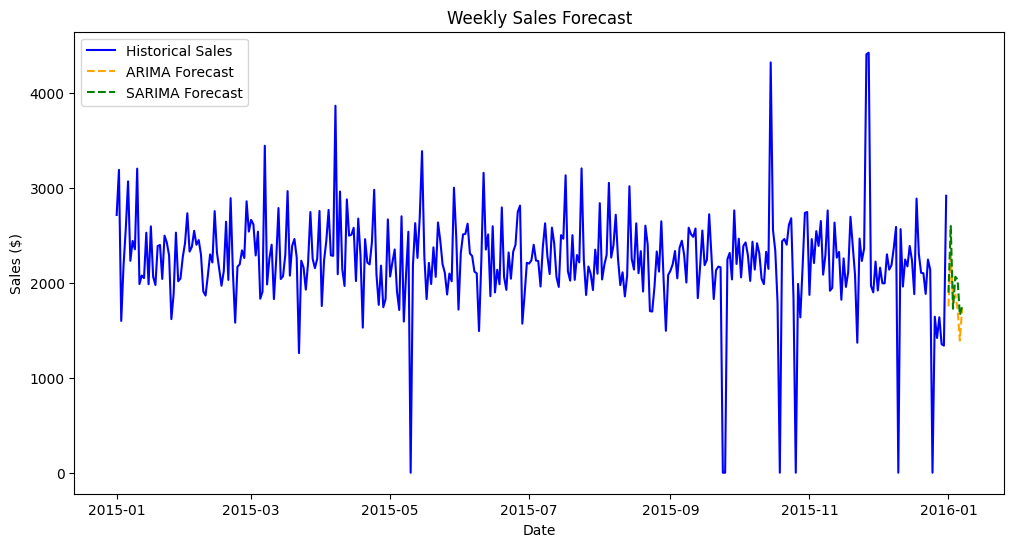

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib

# Load your feature-engineered sales data
data = pd.read_csv(r"C:\Users\sonur\OneDrive\Desktop\Projects\Donimos\pizza_sales_with_features.csv")

# Convert the order_date column to datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Set order_date as the index
data.set_index('order_date', inplace=True)

# Group by date and sum total_price to get daily sales
daily_sales = data.resample('D')['total_price'].sum()

# Split the data into train and test sets
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales.iloc[:train_size], daily_sales.iloc[train_size:]

# Train ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Train SARIMA model
sarima_model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Forecast for the next week (7 days)
n_days = 7

# ARIMA Forecast
arima_forecast_week = arima_fit.forecast(steps=n_days)

# SARIMA Forecast
sarima_forecast_week = sarima_fit.forecast(steps=n_days)

# Create a DataFrame for the forecasts
forecast_dates = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=n_days)
forecast_results = pd.DataFrame({
    'Date': forecast_dates,
    'ARIMA Forecast': arima_forecast_week,
    'SARIMA Forecast': sarima_forecast_week
})

# Set the Date as the index
forecast_results.set_index('Date', inplace=True)

# Save the forecast results to a CSV file
forecast_results.to_csv('weekly_forecast_results.csv')
print("Weekly forecast results saved to 'weekly_forecast_results.csv'.")

# Print the forecast results
print(forecast_results)

# Plot the forecast results
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Historical Sales', color='blue')
plt.plot(forecast_results['ARIMA Forecast'], label='ARIMA Forecast', color='orange', linestyle='--')
plt.plot(forecast_results['SARIMA Forecast'], label='SARIMA Forecast', color='green', linestyle='--')
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()
